🎨 NEURAL STYLE TRANSFER - CodTech Task 3

📷 Enter path to your content image (e.g., content.jpg): /content/figures.jpg
🎨 Enter path to your style image (e.g., style.jpg): /content/Vassily_Kandinsky,_1913_-_Composition_7.jpg

🖼️ Loading images...
🧠 Loading style transfer model from TensorFlow Hub...
🎨 Applying style transfer. Please wait...
✅ Style transfer complete!
💾 Stylized image saved as 'stylized_output.jpg'


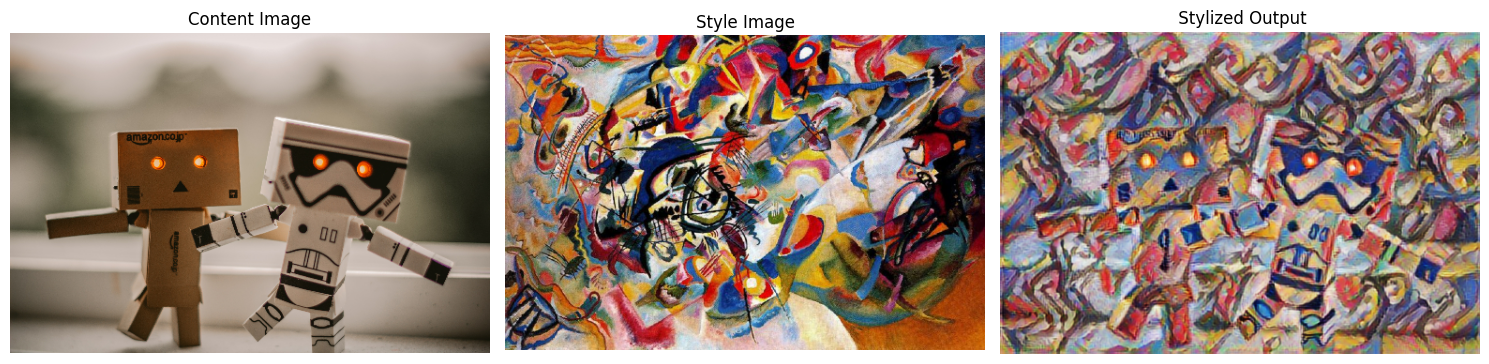

In [ ]:
# ===============================================
# 🎨 CodTech AI Internship - Task 3
# ✅ Neural Style Transfer with TensorFlow Hub
# Developed using: TensorFlow, TensorFlow Hub, PIL, Matplotlib
# ===============================================

import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import os

def load_image(image_path, max_dim=512):
    """
    Loads and preprocesses an image from a path.
    Scales to max_dim while keeping aspect ratio.
    """
    try:
        img = tf.io.read_file(image_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)

        shape = tf.cast(tf.shape(img)[:-1], tf.float32)
        scale = max_dim / max(shape)
        new_shape = tf.cast(shape * scale, tf.int32)

        img = tf.image.resize(img, new_shape)
        img = img[tf.newaxis, :]  # Add batch dimension
        return img
    except Exception as e:
        print(f"❌ Error loading image: {image_path}\n{str(e)}")
        return None

def tensor_to_image(tensor):
    """
    Converts a tensor to a displayable PIL image.
    """
    tensor = tensor * 255
    tensor = tf.cast(tensor[0], tf.uint8)
    return PIL.Image.fromarray(tensor.numpy())

def display_images(content, style, output):
    """
    Displays content, style, and stylized images side-by-side.
    """
    plt.figure(figsize=(15, 5))

    titles = ['Content Image', 'Style Image', ' Stylized Output']
    images = [content, style, output]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.title(titles[i])
        plt.imshow(images[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def stylize(content_path, style_path):
    """
    Runs the neural style transfer model and outputs the result.
    """
    print("\n🖼️ Loading images...")
    content_image = load_image(content_path)
    style_image = load_image(style_path)

    if content_image is None or style_image is None:
        print("❌ Could not load one or both images. Exiting.")
        return

    print("🧠 Loading style transfer model from TensorFlow Hub...")
    model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

    print("🎨 Applying style transfer. Please wait...")
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    result_image = tensor_to_image(stylized_image)

    print("✅ Style transfer complete!")
    result_image.save("stylized_output.jpg")
    print("💾 Stylized image saved as 'stylized_output.jpg'")

    # Show all images
    display_images(tf.squeeze(content_image), tf.squeeze(style_image), result_image)

def main():
    print("===============================================")
    print("🎨 NEURAL STYLE TRANSFER - CodTech Task 3")
    print("===============================================\n")

    content_path = input("📷 Enter path to your content image (e.g., content.jpg): ").strip().replace("\\", "/")
    style_path = input("🎨 Enter path to your style image (e.g., style.jpg): ").strip().replace("\\", "/")

    # Check if files exist
    if not os.path.exists(content_path):
        print("❌ Content image not found.")
        return
    if not os.path.exists(style_path):
        print("❌ Style image not found.")
        return

    stylize(content_path, style_path)

if __name__ == "__main__":
    main()
